# magicgui

## Type-based GUI autogeneration for python

https://pyapp-kit.github.io/magicgui/

https://github.com/pyapp-kit/magicgui/

## Installation
### With pip
```bash
pip install magicgui[pyqt5]
#or
pip install magicgui[pyside2]
```

### With conda
```
conda install -c conda-forge magicgui pyqt
```

## Use
The core feature of `magicgui` is the `@magicgui` decorator, which turns a function into an appropriate widget.

In [1]:
from magicgui import magicgui
from magicgui.tqdm import trange

import datetime
import napari
import skimage

from pathlib import Path
from time import sleep


import matplotlib.pyplot as plt
from matplotlib.backends.backend_qt5agg import FigureCanvas
import numpy as np


import napari
from napari.layers import Image
from napari.types import ImageData

from magicgui import magicgui


### Basic GUI, input widget based on type

19


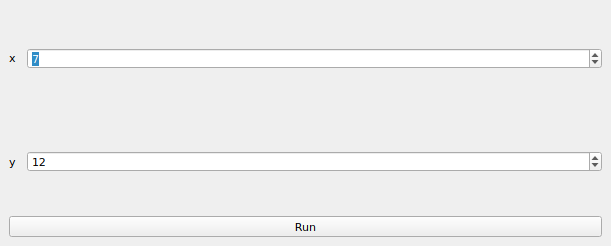

In [2]:
@magicgui
def add(x: int, y: int):
    print(x + y)


add.show(run=True)

### Add a dropdown

30


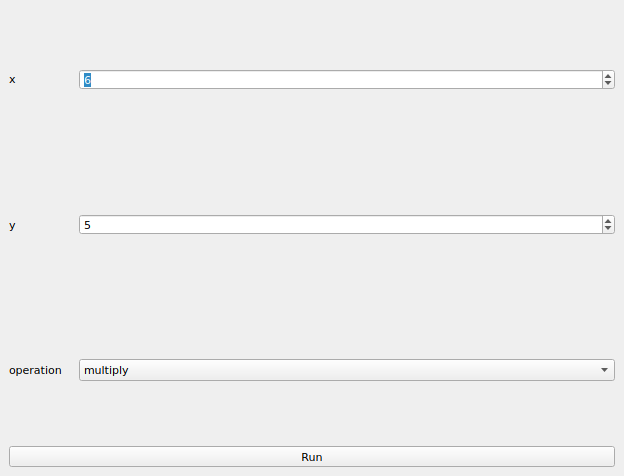

In [3]:
@magicgui(operation={"choices": ["add", "subtract", "multiply", "divide"]})
def calculator(x: int, y: int, operation="add"):
    if operation == "add":
        print(x + y)
    elif operation == "subtract":
        print(x - y)
    elif operation == "multiply":
        print(x * y)
    elif operation == "divide":
        print(x / y)

calculator.show(run=True)

### Customise

Rename run button & display result in GUI

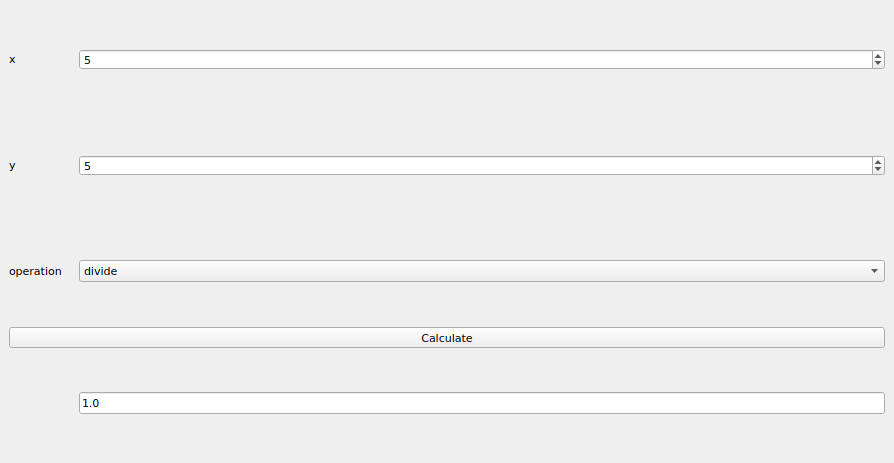

In [4]:
@magicgui(operation={"choices": ["add", "subtract", "multiply", "divide"]},
         call_button="Calculate", result_widget=True)
def calculator(x: int, y: int, operation="add"):
    if operation == "add":
        return x + y
    elif operation == "subtract":
        return x - y
    elif operation == "multiply":
        return x * y
    elif operation == "divide":
        return x / y

calculator.show(run=True)

### Pretend the calculation is lengthy and add a progress bar

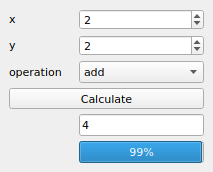

In [5]:
@magicgui(operation={"choices": ["add", "subtract", "multiply", "divide"]},
         call_button="Calculate", result_widget=True)
def calculator(x: int, y: int, operation="add"):
    for _i in trange(100):
        sleep(0.01)
        
    if operation == "add":
        return x + y
    elif operation == "subtract":
        return x - y
    elif operation == "multiply":
        return x * y
    elif operation == "divide":
        return x / y

calculator.show(run=True)

### Change widget types

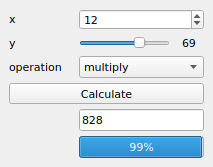

In [6]:
@magicgui(operation={"choices": ["add", "subtract", "multiply", "divide"]},
         call_button="Calculate", result_widget=True,
         x={"widget_type": "SpinBox","min": 0, "max": 100},
         y={"widget_type": "Slider", "min": 0, "max": 100})
def calculator(x: int, y: int, operation="add"):
    for _i in trange(100):
        sleep(0.01)
        
    if operation == "add":
        return x + y
    elif operation == "subtract":
        return x - y
    elif operation == "multiply":
        return x * y
    elif operation == "divide":
        return x / y

calculator.show(run=True)

### Add some extra widgets
`magicgui` will choose the widget based on the type

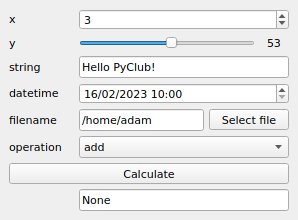

In [7]:
@magicgui(operation={"choices": ["add", "subtract", "multiply", "divide"]},
         call_button="Calculate", result_widget=True,
         x={"widget_type": "SpinBox","min": 0, "max": 100},
         y={"widget_type": "Slider", "min": 0, "max": 100})
def calculator(x: int, 
               y: int, 
               string="Hello PyClub!",
               datetime=datetime.datetime.now(),
               filename=Path.home(),
               operation="add"):
    
    for _i in trange(100):
        sleep(0.01)
        
    if operation == "add":
        return x + y
    elif operation == "subtract":
        return x - y
    elif operation == "multiply":
        return x * y
    elif operation == "divide":
        return x / y

calculator.show(run=True)

### Add tooltips by adding docstrings

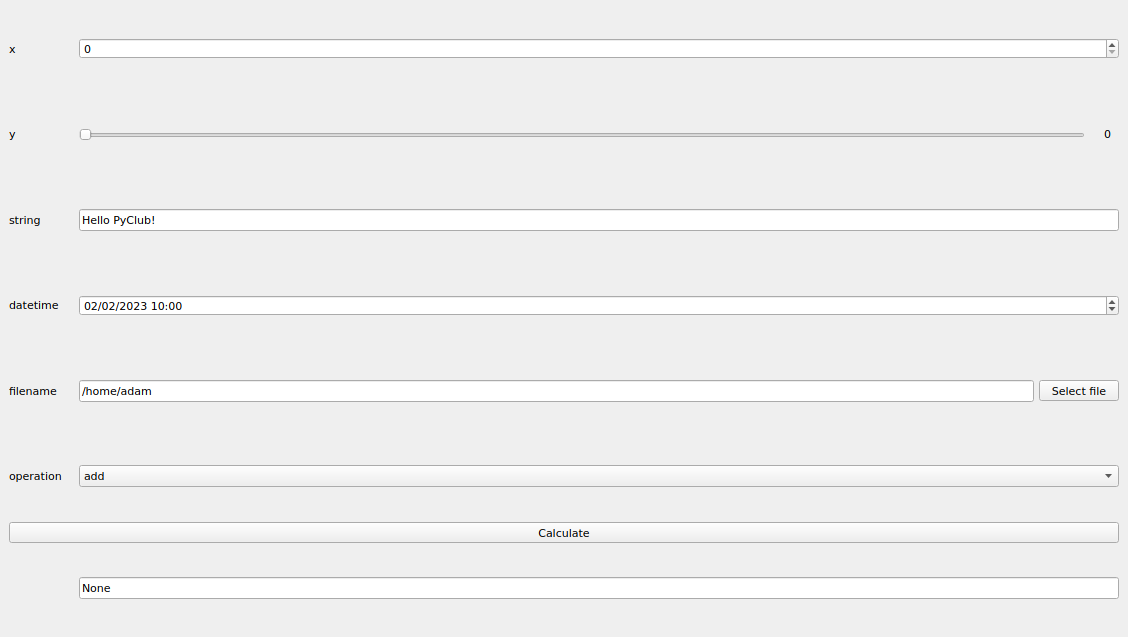

In [8]:
@magicgui(operation={"choices": ["add", "subtract", "multiply", "divide"]},
         call_button="Calculate", result_widget=True,
         x={"widget_type": "SpinBox","min": 0, "max": 100},
         y={"widget_type": "Slider", "min": 0, "max": 100})
def calculator(x: int, 
               y: int, 
               string="Hello PyClub!",
               datetime=datetime.datetime.now(),
               filename=Path.home(),
               operation="add"):
    
        """Calculator app.
        
        Parameters
        ----------
        x : int
            The first number
        y : int
            The second number
        datetime : datetime.datetime, optional
            The date and time
        filename : str, optional
            Pick a path, by default Path.home()
        """
        
    
        for _i in trange(100):
            sleep(0.01)

        if operation == "add":
            return x + y
        elif operation == "subtract":
            return x - y
        elif operation == "multiply":
            return x * y
        elif operation == "divide":
            return x / y

calculator.show(run=True)

### Combine with matplotlib

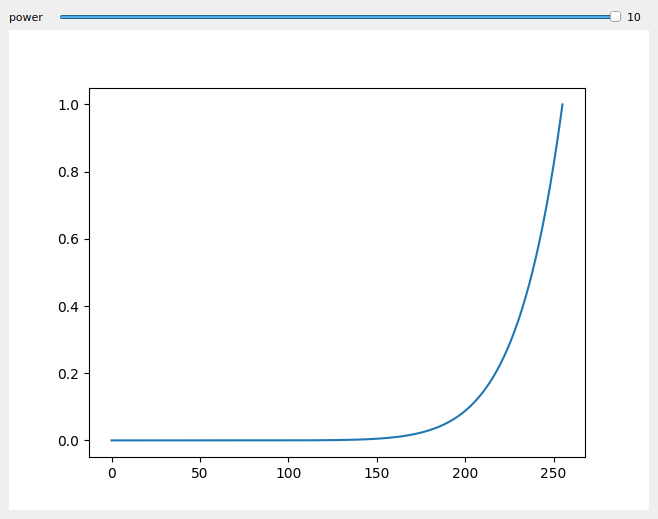

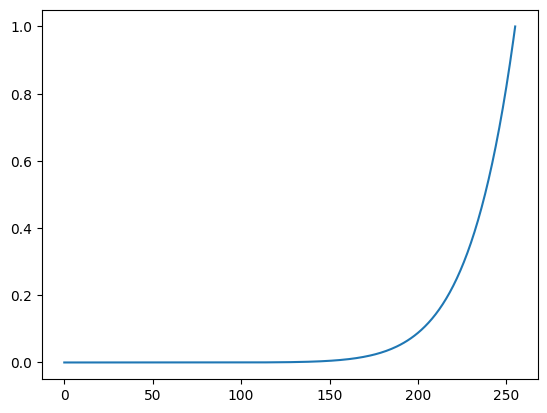

In [9]:
x = np.linspace(0, 1, 256)
y = 1

mpl_fig = plt.figure()
ax = mpl_fig.add_subplot(111)
(line,) = ax.plot(x ** y)  # linescan through the middle of the image


@magicgui(power={"widget_type": "Slider", "max": 10},
          auto_call=True)
def f(power: int):
    line.set_ydata(x ** power)
    line.figure.canvas.draw()


# rather than using the Container.append (`f.append`) ...
# grab the native layout and add the QWidget to it
f.native.layout().addWidget(FigureCanvas(mpl_fig))
f.show(run=True)


### Add magigui widget to napari

In [ ]:
viewer = napari.Viewer()
viewer.add_image(skimage.data.astronaut().mean(-1), name="astronaut")


@magicgui(
    auto_call=True,
    sigma={"widget_type": "FloatSlider", "max": 6},
    layout="horizontal",
)
def gaussian_blur(layer: Image, sigma: float = 1.0) -> ImageData:
    return skimage.filters.gaussian(layer.data, sigma=sigma)

viewer.window.add_dock_widget(gaussian_blur, area="bottom")

napari.run()

### Open cellfinder plugin

In [11]:
viewer = napari.Viewer()
napari.run()